In [6]:
import pandas as pd
import numpy as np

datafile = '../../data/chapter4/demo/data/discretization_data.xls'
data = pd.read_excel(datafile)
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [7]:
data = data['肝气郁结证型系数'].copy()
k = 4

## 等宽离散化

In [8]:
d1 = pd.cut(data, k, labels=range(k)) # 等宽离散化，自动计算宽度

0      0
1      3
2      0
3      2
4      1
      ..
925    2
926    0
927    2
928    2
929    1
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

## 等频离散化

In [22]:
w = [1.0 * i/k for i in range(k+1)]
w = data.describe(percentiles=w)[4:4+k+1]
w[0] = w[0] * (1 - 1e-10)
d2 = pd.cut(data, bins=w, labels=range(k))

0      0
1      3
2      0
3      3
4      2
      ..
925    3
926    0
927    3
928    3
929    0
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

## 基于聚类的离散化

In [35]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=k) # 指定簇数

kmeans_model.fit(np.array(data).reshape(len(data), 1))
# kmeans_model.cluster_centers_ # 聚类中心
c = pd.DataFrame(kmeans_model.cluster_centers_).sort_values(0)

,0
0,0.136954
3,0.220441
1,0.295007
2,0.408679


In [42]:
w = c.rolling(2).mean() # 相邻两个聚类中心求平均，将这几个点作为分隔
w = w.dropna()
w = [0] + list(w[0]) + [data.max()] # 给首尾添加上极值点，对数据进行分组
d3 = pd.cut(data, w, labels=range(k))

0      0
1      3
2      0
3      2
4      1
      ..
925    2
926    0
927    2
928    2
929    0
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

## 定义绘图函数

In [46]:
# d: grouped data
# k: group number
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(8, 3))
    for j in range(0, k): # 根据分组来绘图
        plt.plot(data[d==j], [j for i in d[d==j]])

    plt.ylim(-0.5, k-0.5) # 凸显每个分组
    return plt

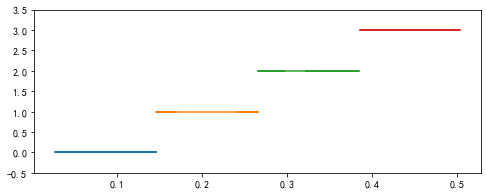

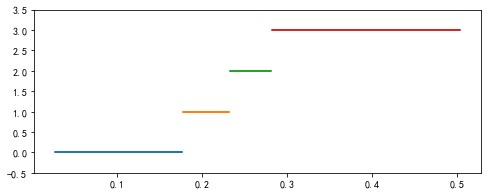

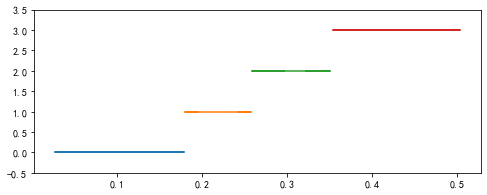

In [47]:
cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()